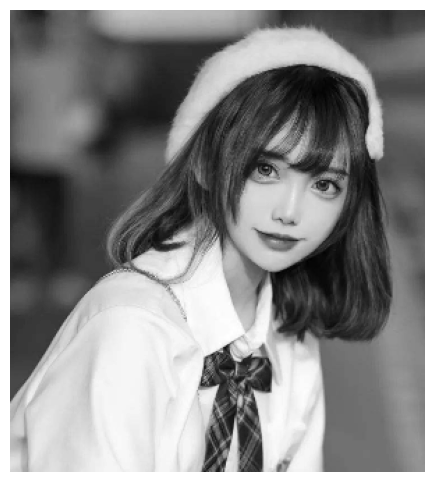

In [10]:
import numpy as np
##使用一张图片来展示经过卷积后的图像效果
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image

##读取图像-->转化为灰度图片-->转化为Numpy数组
myim = Image.open("../data/img.png")
myimgray = np.array(myim.convert("L"), dtype=np.float32)
##可视化图片
plt.figure(figsize=(6, 6))
plt.imshow(myimgray, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [11]:
##将数组转化为张量
imh, imw = myimgray.shape
myimgray_t = torch.from_numpy(myimgray.reshape((1, 1, imh, imw)))
myimgray_t.shape

torch.Size([1, 1, 332, 298])

卷积后尺寸： torch.Size([2, 328, 294])


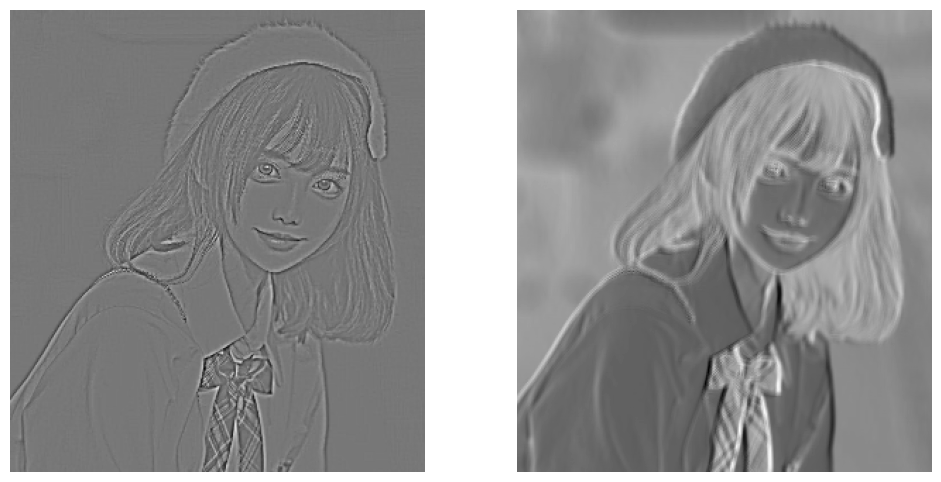

In [12]:
##对灰度图像精选卷积提取图像轮廓
kersize = 5  ##定义边缘检测卷积核，并将维度处理为1*1*5*5
ker=torch.ones(kersize,kersize,dtype=torch.float)*-1
ker[2,2]=24
ker=ker.reshape((1,1,kersize,kersize))
##进行卷积操作
conv2d=nn.Conv2d(1,2,(kersize,kersize),bias=False)
#设置卷积时使用的核，第一个使用边缘检测核
conv2d.weight.data[0]=ker
##对灰度图像进行卷积操作
imconv2dout=conv2d(myimgray_t)
##对卷积后的输出进行维度压缩
imconv2dout_im=imconv2dout.data.squeeze()
print("卷积后尺寸：",imconv2dout_im.shape)
## 可视化卷积后的图像
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imconv2dout_im[0],cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(imconv2dout_im[1],cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [13]:
##对卷积后的结果进行最大池化
maxpool2=nn.MaxPool2d(2,stride=2)
pool2_out=maxpool2(imconv2dout)
pool2_out_im=pool2_out.squeeze()
pool2_out.shape

torch.Size([1, 2, 164, 147])

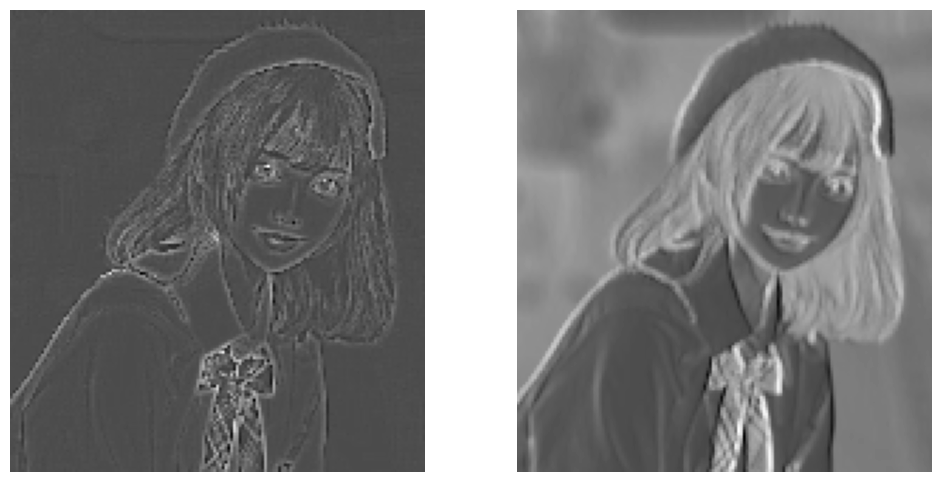

In [14]:
##可视化最大池化后的结果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

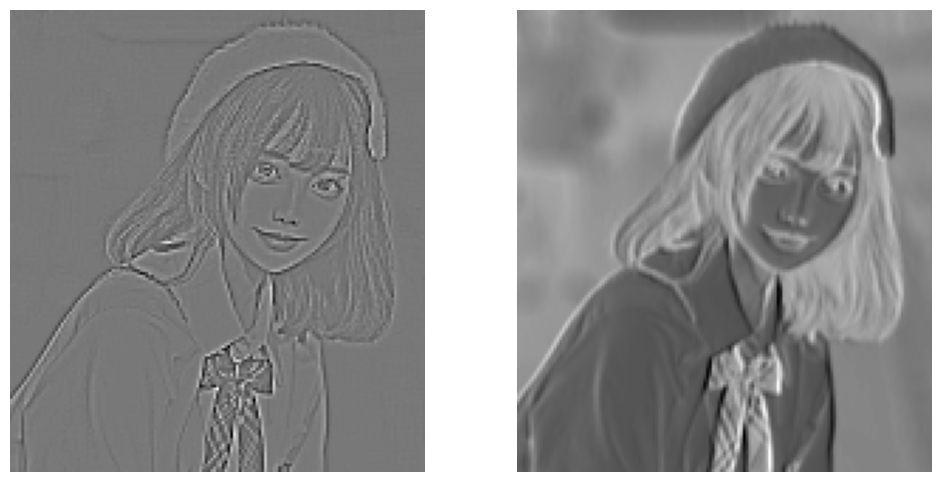

In [15]:
##对卷积后的结果进行平均值池化
avgpool2=nn.AvgPool2d(2,stride=2)
pool2_out=avgpool2(imconv2dout)
pool2_out_im=pool2_out.squeeze()
pool2_out.shape
##可视化平均值池化后的结果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

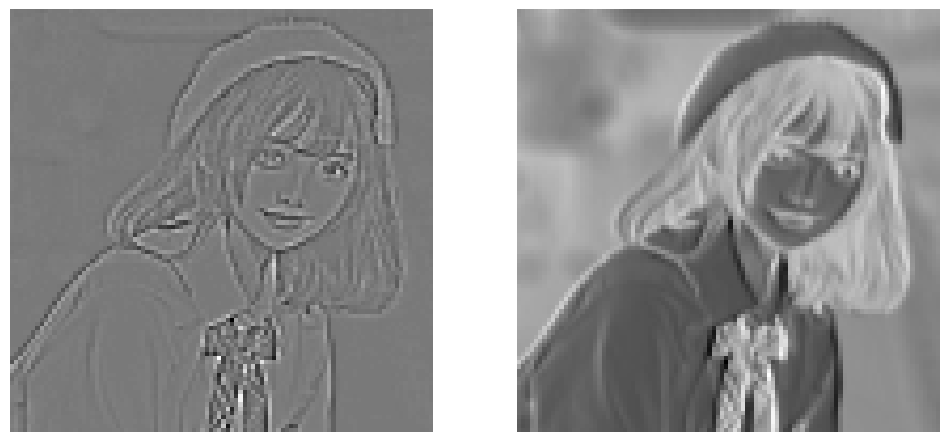

In [16]:
##对卷积后的结果进行自适应平均值池化
AdaAvfpool2=nn.AdaptiveAvgPool2d(output_size=(100,100))
pool2_out=AdaAvfpool2(imconv2dout)
pool2_out_im=pool2_out.squeeze()
pool2_out.shape
##自适应池化平均值池化后的结果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14052\2468345615.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ysoftoluss=softplus(x)


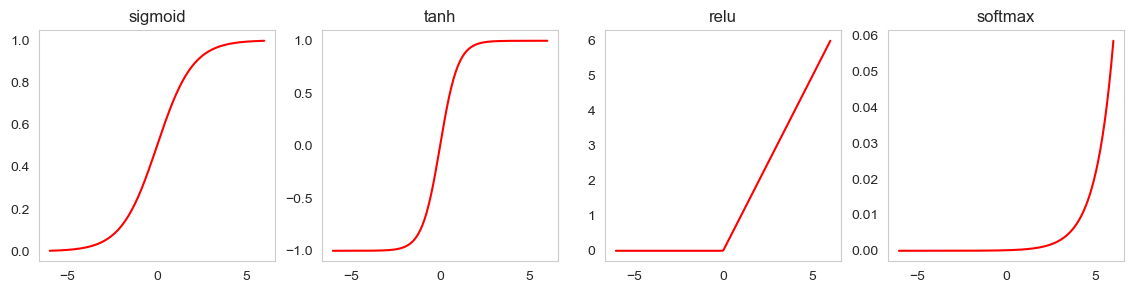

In [17]:
x=torch.linspace(-6,6,200)
sigmoid=nn.Sigmoid()##Sigmoid激活函数
ysigmoid=sigmoid(x)
tanh=nn.Tanh()##Tanh激活函数
ytanh=tanh(x)
relu=nn.ReLU()##ReLU激活函数
yrelu=relu(x)
softplus=nn.Softmax()##softmax激活函数
ysoftoluss=softplus(x)
plt.figure(figsize=(14,3))##可视化激活函数
plt.subplot(1,4,1)
plt.plot(x.data.numpy(),ysigmoid.data.numpy(),"r-")
plt.title("sigmoid")
plt.grid()
plt.subplot(1,4,2)
plt.plot(x.data.numpy(),ytanh.data.numpy(),"r-")
plt.title("tanh")
plt.grid()
plt.subplot(1,4,3)
plt.plot(x.data.numpy(),yrelu.data.numpy(),"r-")
plt.title("relu")
plt.grid()
plt.subplot(1,4,4)
plt.plot(x.data.numpy(),ysoftoluss.data.numpy(),"r-")
plt.title("softmax")
plt.grid()